In [1]:
!pip install pandas
!pip install accelerate
!pip install transformers
import accelerate
import torch
import pandas as pd
from transformers import BertTokenizer, BertForSequenceClassification
from torch.utils.data import Dataset
import numpy as np
from torch.utils.data import TensorDataset
from transformers import TrainingArguments, Trainer
import matplotlib.pyplot as plt

In [2]:
!pip install Textattack

  Preparing metadata (setup.py) ... done
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3.6/3.6 MB 48.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 981.5/981.5 kB 30.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 445.7/445.7 kB 19.4 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 61.1/61.1 kB 5.6 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚

In [3]:
from google.colab import files
import pandas as pd

uploaded = files.upload()

Saving PromiseEval_Sample_Trainset_English.json to PromiseEval_Sample_Trainset_English.json
Saving PromiseEval_Trainset_English.json to PromiseEval_Trainset_English.json


In [4]:
import pandas as pd

json_file1 = '/content/PromiseEval_Sample_Trainset_English.json'
json_file2=  '/content/PromiseEval_Trainset_English.json'
csv_file = '/content/data.csv'  # Replace with your desired CSV file name

# Read the JSON file
df1 = pd.read_json(json_file1)
df2 = pd.read_json(json_file2)

# Concatenate the DataFrames
df = pd.concat([df1, df2], ignore_index=True)

# Convert to CSV
df.to_csv(csv_file, index=False)
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)
df['promise_status'] = df['promise_status'].replace({'Yes': 1, 'No': 0})
df['evidence_status'] = df['evidence_status'].replace({'Yes': 1, 'No': 0})
print(f'JSON has been successfully converted to CSV: {csv_file}')


JSON has been successfully converted to CSV: /content/data.csv


<ipython-input-4-09dbd61cf581>:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)
<ipython-input-4-09dbd61cf581>:17: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['promise_status'] = df['promise_status'].replace({'Yes': 1, 'No': 0})
<ipython-input-4-09dbd61cf581>:18: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['evidence_status'] = df['evidence_status'].replace({'Yes': 1, 'No': 0})


In [1]:
# import textattack
# from textattack.augmentation import BackTranslationAugmenter

# # Use BackTranslationAugmenter for more coherent augmentations
# augmenter = BackTranslationAugmenter()

In [5]:
ver_df = df.copy()
qua_df = df.copy()
df

URL  page_number  \
0    https://r.lvmh-static.com/uploads/2023/06/06-2...           10   
1    https://r.lvmh-static.com/uploads/2023/06/06-2...           13   
2    https://r.lvmh-static.com/uploads/2023/06/06-2...           14   
3    https://r.lvmh-static.com/uploads/2023/06/06-2...           15   
4    https://r.lvmh-static.com/uploads/2023/06/06-2...           16   
..                                                 ...          ...   
595  https://www.baytexenergy.com/content/uploads/2...           29   
596  https://www.baytexenergy.com/content/uploads/2...           29   
597  https://www.baytexenergy.com/content/uploads/2...           80   
598  https://www.baytexenergy.com/content/uploads/2...           80   
599  https://www.baytexenergy.com/content/uploads/2...           81   

                                                  data  promise_status  \
0    ‚ÄúLVMH is transforming the luxury industry.‚ÄùPRO...               0   
1    ‚ÄúEach of us has the teams required to achieve ...               0   
2    ‚ÄúThe LVMH Prize has allowed me to help change ...               0   
3    ‚ÄúLVMH shows an extraordinary level of commitme...               0   
4    GROUP-WIDE OVERSIGHT BODIES The Board-level Et...               0   
..                                                 ...             ...   
595  Continual improvement We follow up on high-pot...               1   
596  Emergency preparedness We maintain and rehears...               1   
597  The climate policies and regulations most rele...               0   
598  SENSITIVITY ANALYSIS As part of the scenario a...               1   
599  Methane Regulations In 2018, Environment and C...               1   

    verification_timeline  evidence_status evidence_quality  
0                     N/A                0              N/A  
1                     N/A                0              N/A  
2                     N/A                0              N/A  
3                     N/A                0              N/A  
4                     N/A                0              N/A  
..                    ...              ...              ...  
595               Already                1        Not Clear  
596               Already                1            Clear  
597                   N/A                0              N/A  
598     More than 5 years                1            Clear  
599     More than 5 years                1            Clear  

[600 rows x 7 columns]

In [23]:
ver_df = ver_df.drop('page_number', axis=1)
ver_df = ver_df.drop('URL', axis=1)
ver_df = ver_df.drop('evidence_status', axis=1)
ver_df = ver_df.drop('evidence_quality', axis=1)

ver_df['verification_timeline'] = ver_df['verification_timeline'].str.strip()
df_bin = pd.get_dummies(ver_df['verification_timeline'])
vdf_final = pd.concat([ver_df, df_bin], axis=1)
vdf_final = vdf_final.drop('verification_timeline', axis=1)
bool_cols = vdf_final.select_dtypes(include='bool').columns
vdf_final[bool_cols] = vdf_final[bool_cols].astype(int)
vdf_final

data  promise_status  \
0    ‚ÄúLVMH is transforming the luxury industry.‚ÄùPRO...               0   
1    ‚ÄúEach of us has the teams required to achieve ...               0   
2    ‚ÄúThe LVMH Prize has allowed me to help change ...               0   
3    ‚ÄúLVMH shows an extraordinary level of commitme...               0   
4    GROUP-WIDE OVERSIGHT BODIES The Board-level Et...               0   
..                                                 ...             ...   
595  Continual improvement We follow up on high-pot...               1   
596  Emergency preparedness We maintain and rehears...               1   
597  The climate policies and regulations most rele...               0   
598  SENSITIVITY ANALYSIS As part of the scenario a...               1   
599  Methane Regulations In 2018, Environment and C...               1   

     2 to 5 years  Already  Less than 2 years  More than 5 years  N/A  
0               0        0                  0                  0    1  
1               0        0                  0                  0    1  
2               0        0                  0                  0    1  
3               0        0                  0                  0    1  
4               0        0                  0                  0    1  
..            ...      ...                ...                ...  ...  
595             0        1                  0                  0    0  
596             0        1                  0                  0    0  
597             0        0                  0                  0    1  
598             0        0                  0                  1    0  
599             0        0                  0                  1    0  

[600 rows x 7 columns]

In [52]:
# unique_counts = qua_df['evidence_status'].value_counts()
# unique_counts

In [21]:
qua_df = qua_df.drop('page_number', axis=1)
qua_df = qua_df.drop('URL', axis=1)
qua_df = qua_df.drop('verification_timeline', axis=1)

qua_df['evidence_quality'] = qua_df['evidence_quality'].str.strip()
df_bin = pd.get_dummies(qua_df['evidence_quality'])
qdf_final = pd.concat([qua_df, df_bin], axis=1)
qdf_final = qdf_final.drop('evidence_quality', axis=1)
bool_cols = qdf_final.select_dtypes(include='bool').columns
qdf_final[bool_cols] = qdf_final[bool_cols].astype(int)
qdf_final

data  promise_status  \
0    ‚ÄúLVMH is transforming the luxury industry.‚ÄùPRO...               0   
1    ‚ÄúEach of us has the teams required to achieve ...               0   
2    ‚ÄúThe LVMH Prize has allowed me to help change ...               0   
3    ‚ÄúLVMH shows an extraordinary level of commitme...               0   
4    GROUP-WIDE OVERSIGHT BODIES The Board-level Et...               0   
..                                                 ...             ...   
595  Continual improvement We follow up on high-pot...               1   
596  Emergency preparedness We maintain and rehears...               1   
597  The climate policies and regulations most rele...               0   
598  SENSITIVITY ANALYSIS As part of the scenario a...               1   
599  Methane Regulations In 2018, Environment and C...               1   

     evidence_status  Clear  Misleading  N/A  Not Clear  
0                  0      0           0    1          0  
1                  0      0           0    1          0  
2                  0      0           0    1          0  
3                  0      0           0    1          0  
4                  0      0           0    1          0  
..               ...    ...         ...  ...        ...  
595                1      0           0    0          1  
596                1      1           0    0          0  
597                0      0           0    1          0  
598                1      1           0    0          0  
599                1      1           0    0          0  

[600 rows x 7 columns]

In [54]:
qdf_final.to_csv('/content/qdata.csv' , index=False)
vdf_final.to_csv('/content/vdata.csv' , index=False)

In [25]:
# label_df = vdf_final[['data',	'promise_status',	'2 to 5 years',	'Already',	'Less than 2 years',	'More than 5 years',	'N/A']]
label_df = vdf_final[['data',	'promise_status']]
label_df
unique_counts = label_df['promise_status'].value_counts()
print(unique_counts)

promise_status
1    482
0    118
Name: count, dtype: int64


In [26]:
import pandas as pd
from sklearn.utils import shuffle
label_df = shuffle(label_df, random_state=42)

In [27]:
train_df = label_df[:420]
validation_df = label_df[420:500]
test_df = label_df[500:]
train_labels_df = label_df[:420]
validation_labels_df = label_df[420:500]
test_labels_df = label_df[500:]

In [28]:
unique_counts = train_df['promise_status'].value_counts()
print(unique_counts)
unique_counts2 = validation_df['promise_status'].value_counts()
print(unique_counts2)

promise_status
1    345
0     75
Name: count, dtype: int64
promise_status
1    66
0    14
Name: count, dtype: int64


In [29]:
train_sentences = train_df['data'].values.tolist()
train_labels = train_labels_df.iloc[:, 1:].values
train_labels = train_labels.astype(np.float32)

validation_sentences = validation_df['data'].values.tolist()
validation_labels = validation_labels_df.iloc[:, 1:].values
validation_labels = validation_labels.astype(np.float32)

In [56]:
from transformers import AutoTokenizer

checkpoint = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

model = BertForSequenceClassification.from_pretrained(checkpoint, num_labels=1)
model.resize_token_embeddings(len(tokenizer))
model

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

In [57]:
from transformers import Trainer, TrainingArguments

training_args = TrainingArguments(
    output_dir=".",
    evaluation_strategy="epoch",
    logging_dir="./logs",
    save_strategy="epoch",
    num_train_epochs = 8,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=32,
    load_best_model_at_end=True,
    weight_decay=0.01,
    learning_rate = 8e-6,
    warmup_steps = 30,
    logging_steps= 100,
    metric_for_best_model="f1"
)

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(


In [58]:
class ArgDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

In [59]:
train_encodings = tokenizer(train_sentences, padding = True, truncation = True, max_length = 512)
train_dataset = ArgDataset(train_encodings, train_labels)

validation_encodings = tokenizer(validation_sentences, padding = True, truncation = True, max_length = 512)
validation_dataset = ArgDataset(validation_encodings, validation_labels)

In [60]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

label_names = train_labels_df.columns[1:].tolist()

def compute_metrics(pred):
    labels = pred.label_ids
    preds = (pred.predictions > 0.6).astype(int)  # Convert probabilities to binary predictions

    accuracy = accuracy_score(labels, preds)
    precision = precision_score(labels, preds, average='weighted', zero_division=0)
    recall = recall_score(labels, preds, average='weighted', zero_division=0)
    f1 = f1_score(labels, preds, average='weighted', zero_division=0)

    # Generate classification report
    # report = classification_report(labels, preds, target_names=label_names, zero_division=0)

    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        # 'classification_report': report
    }

import wandb
wandb.init(mode="disabled")

In [61]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=validation_dataset,
    compute_metrics=compute_metrics,
)

trainer.train()


TrainOutput(global_step=216, training_loss=0.0847834387311229, metrics={'train_runtime': 415.2243, 'train_samples_per_second': 8.092, 'train_steps_per_second': 0.52, 'total_flos': 884045208453120.0, 'train_loss': 0.0847834387311229, 'epoch': 8.0})

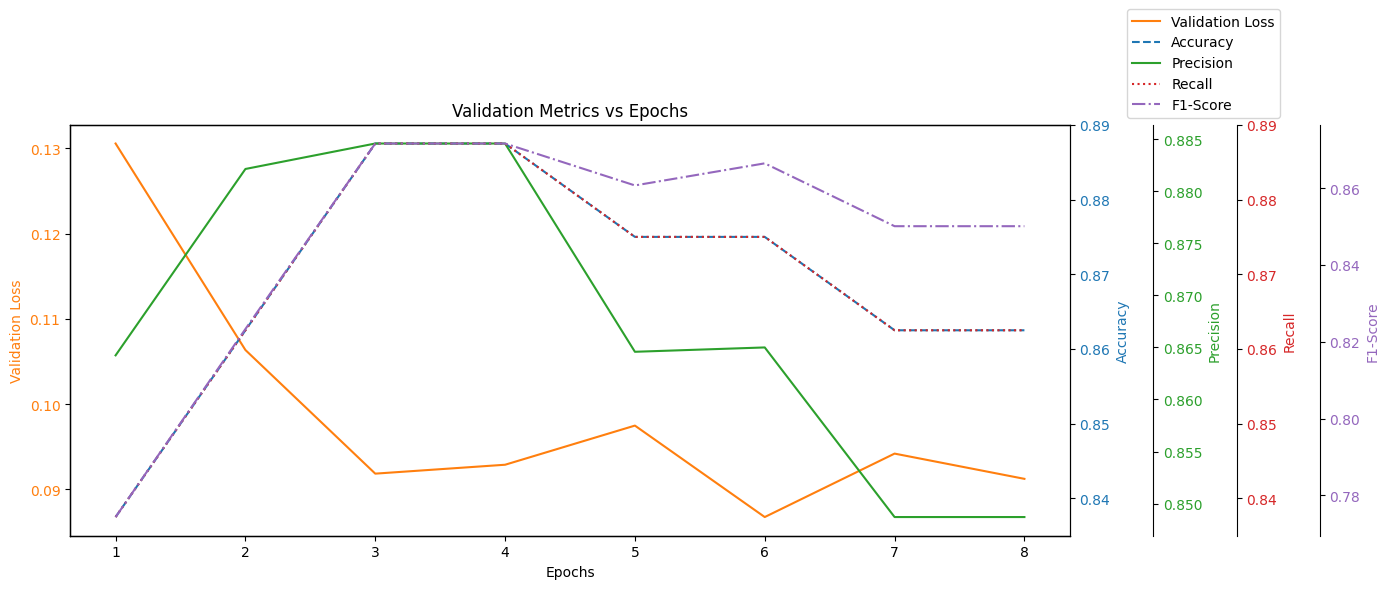

In [62]:
import matplotlib.pyplot as plt

# Extract the log history from the trainer
log_history = trainer.state.log_history

# Initialize lists for storing values
losses = []
accuracies = []
precisions = []
f1_scores = []
recalls = []

# Parse through the log history and extract values
for entry in log_history:
    if 'eval_loss' in entry and 'eval_accuracy' in entry and 'eval_precision' in entry and 'eval_recall' in entry and 'eval_f1' in entry:
        losses.append(entry['eval_loss'])
        accuracies.append(entry['eval_accuracy'])
        precisions.append(entry['eval_precision'])
        f1_scores.append(entry['eval_f1'])
        recalls.append(entry['eval_recall'])

# Define epochs (adjust based on your actual epoch range)
epochs = list(range(1, len(losses) + 1))

# Create a figure and axis for plotting
fig, ax1 = plt.subplots(figsize=(14, 6))

# Plot the first metric (loss) on the primary y-axis
ax1.plot(epochs, losses, color='tab:orange', label='Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Validation Loss', color='tab:orange')
ax1.tick_params(axis='y', labelcolor='tab:orange')

# Create a secondary y-axis for Accuracy
ax2 = ax1.twinx()
ax2.plot(epochs, accuracies, color='tab:blue', linestyle='--', label='Accuracy')
ax2.set_ylabel('Accuracy', color='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:blue')

# Create a tertiary y-axis for Precision
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))  # Offset the third y-axis
ax3.plot(epochs, precisions, color='tab:green', linestyle='-', label='Precision')
ax3.set_ylabel('Precision', color='tab:green')
ax3.tick_params(axis='y', labelcolor='tab:green')

# Create a fourth y-axis for Recall
ax4 = ax1.twinx()
ax4.spines['right'].set_position(('outward', 120))  # Offset the fourth y-axis
ax4.plot(epochs, recalls, color='tab:red', linestyle=':', label='Recall')
ax4.set_ylabel('Recall', color='tab:red')
ax4.tick_params(axis='y', labelcolor='tab:red')

# Create a fifth y-axis for F1-score
ax5 = ax1.twinx()
ax5.spines['right'].set_position(('outward', 180))  # Offset the fifth y-axis
ax5.plot(epochs, f1_scores, color='tab:purple', linestyle='-.', label='F1-Score')
ax5.set_ylabel('F1-Score', color='tab:purple')
ax5.tick_params(axis='y', labelcolor='tab:purple')

# Add legends for each line
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines3, labels3 = ax3.get_legend_handles_labels()
lines4, labels4 = ax4.get_legend_handles_labels()
lines5, labels5 = ax5.get_legend_handles_labels()

ax2.legend(lines1 + lines2 + lines3 + lines4 + lines5,
           labels1 + labels2 + labels3 + labels4 + labels5,
           loc='lower left', bbox_to_anchor=(1.05, 1))

# Title and grid
plt.title('Validation Metrics vs Epochs')
plt.grid(False)

# Show the plot
plt.tight_layout()
plt.show()


In [63]:
model.save_pretrained("/content/")
model = BertForSequenceClassification.from_pretrained("/content/")

In [64]:
test_df.insert(0, 'Index', range(1, len(test_labels_df) + 1))
test_labels_df.insert(0, 'Index', range(1, len(test_labels_df) + 1))
test_labels_df

Index                                               data  promise_status
267      1  Biodiversity in our operating areas Baytex‚Äôs o...               0
327      2  We also believe that cybersecurity regulations...               1
200      3  Set up in FY 2019/20, Burberry‚Äôs Internal Dive...               0
134      4  ESG frameworkClimate Circular Colleagues Colla...               0
27       5  Supporting older employees LVMH‚Äôs most experie...               1
..     ...                                                ...             ...
71      96  ESG focus areas Our approach to corporate resp...               1
106     97  ESG Risk Management ESG risk management has ga...               1
270     98  Being a Good Neighbour We recognize that our a...               1
435     99  Third-party responsibilities The group proacti...               1
102    100  Proactive Risk Management Risk is inherent in ...               1

[100 rows x 3 columns]

In [74]:
predictions = []
threshold = 0.7

for idx, row in test_df.iterrows():
    arg_id = row['Index']
    text = row['data']
    encoding = tokenizer(text, padding=True, truncation=True, max_length=512, return_tensors='pt')
    with torch.no_grad():
        outputs = model(**encoding)

    sigmoid = torch.nn.Sigmoid()
    predictions_tensor = sigmoid(outputs.logits)

    predicted_labels = []
    for prob in predictions_tensor.flatten():
        if prob >= threshold:
          label = 1
        else:
          label =  0
        predicted_labels.append(label)

    predictions.append([arg_id] + predicted_labels)

data = {'Index': [entry[0] for entry in predictions]}

for i, label in enumerate(test_labels_df.columns[2:]):
    data[label] = [entry[i+1] for entry in predictions]
predictions_df = pd.DataFrame(data)


In [75]:
true_pred = test_labels_df[['Index','promise_status']]

In [76]:
# true_labels = true_pred[['promise_status',	'2 to 5 years',	'Already',	'Less than 2 years',	'More than 5 years',	'N/A']]
# pred_labels = predictions_df[['promise_status',	'2 to 5 years',	'Already',	'Less than 2 years',	'More than 5 years',	'N/A']]
true_labels = true_pred[['promise_status']]
pred_labels = predictions_df[['promise_status']]

f1_average = f1_score(true_labels, pred_labels, average='macro')
print(f"Average F1 Score: {f1_average}")

Average F1 Score: 0.7767857142857143


In [77]:
# true_labels = true_pred[['promise_status',	'2 to 5 years',	'Already',	'Less than 2 years',	'More than 5 years',	'N/A']]
# pred_labels = predictions_df[['promise_status',	'2 to 5 years',	'Already',	'Less than 2 years',	'More than 5 years',	'N/A']]

# f1_average = f1_score(true_labels, pred_labels, average='macro')
# print(f"Average F1 Score: {f1_average}")

In [78]:
unique_counts = true_labels['promise_status'].value_counts()
print(unique_counts)
unique_counts2 = pred_labels['promise_status'].value_counts()
print(unique_counts2)

promise_status
1    71
0    29
Name: count, dtype: int64
promise_status
1    73
0    27
Name: count, dtype: int64
